### 青いロボットだけ

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
rc("animation", html="jshtml")

In [136]:
def Fr(X, rr):
    fr = np.array([])
    for i in np.arange(len(X)):
        # i番目のロボット
        fr_i = np.array([])
        for j in np.arange(len(X)):
            if i != j: 
                # Xi-Xj
                molecule = X[i] - X[j] 
                # 反発力が働く場合：反発する
                if np.linalg.norm(molecule) <= rr:
                    norm = np.linalg.norm(molecule) ** 2
                    molecule_norm = molecule/norm
                # 反発しない場合：近くにロボットがいない
                else:
                    molecule_norm = np.array([0.0, 0.0])
                fr_i = np.append(fr_i, (molecule_norm))
        fr = np.append(fr, fr_i.reshape(len(X)-1,2).sum(0))
    return fr.reshape(len(X),2)

def Fa(X, V, ra):
    fa = np.array([])
    for i in np.arange(len(V)):
        fai = np.array([])
        for j in np.arange(len(V)):
            # 反応半径が1.0未満のとき：速度調整が行われない
            if np.linalg.norm(X[i]-X[j]) <= ra:
                Vi = np.array([0,0])
                # Vi = V[j] - V[i]
            # 反応半径にいない場合：群れの外にいる
            else:
                Vi = V[j] - V[i]
                # Vi = np.array([0,0])
            fai = np.append(fai, Vi)
        fa = np.append(fa, fai.reshape(len(V),2).sum(0))        
    return fa.reshape(len(V),2)

def Fh(X):
    fh = np.array([])
    for i in np.arange(len(X)):
        # 他すべての個体における位置の総和/他のロボット数
        Xh = ((X-X[i]).sum(0))/(len(X)-1)
        # Xh - X
        fh = np.append(fh, np.array(Xh - X[i]))
    return fh.reshape(len(V),2)
    
def Ff(V, s=10):
    ff = np.array([])
    for i in np.arange(len(V)):
        ff = np.append(ff, -V[i] * (np.linalg.norm(V[i])-s)/s)
    return ff.reshape(len(V), 2)

def F(X, V, Ka=0.1, Kr=1.0, Kf=0.02, Kh=5, a=200, b=0.1, rr=1.0, ra=1.0):
    F = Kr*Fr(X, rr) + Ka*Fa(X, V, ra) + Kf*Ff(V) + Kh*Fh(X)
    return a * np.tanh(b * F)

MovieWriter imagemagick unavailable; using Pillow instead.


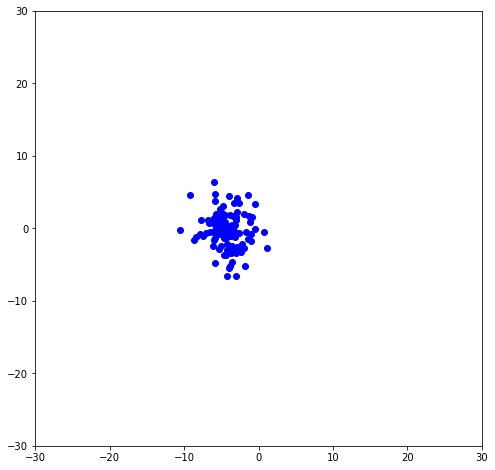

In [141]:
N = 100
X = np.random.randn(N, 2)*50
V = np.random.randn(N, 2)
dt = 0.02

fig = plt.figure(figsize=(8, 8))
ims = []
size = 30
plt.xlim(-size,size)
plt.ylim(-size,size)


for t in np.arange(1, 5, dt):
    
    X, V = X+V*dt, V+F(X, V)*dt

    ims.append([plt.scatter(X[:, 0], X[:, 1], c="b")])

ani = animation.ArtistAnimation(fig, ims, interval=50)
ani.save("ver1_boid.gif", writer="imagemagick")
ani

In [128]:
V = np.arange(0,1,0.1).reshape(5,2)

fa = np.array([])
# 全ての個体を見る
for i in np.arange(len(V)):
    fai = np.array([])
    for j in np.arange(len(V)):
        # 反応半径が1.0未満のとき：速度調整が行われない
        if np.linalg.norm(X[i]-X[j]) <= 1.0:
            Vi = np.array([0,0])
        # 反応半径にいない場合：群れの外にいる
        else:
            Vi = V[j] - V[i]
        fai = np.append(fai, Vi)
    fa = np.append(fa, fai.reshape(5,2).sum(0))
            
fa.reshape(len(V),2)

array([[ 0. ,  0. ],
       [ 0. ,  0. ],
       [ 0.6,  0.6],
       [-0.2, -0.2],
       [-0.4, -0.4]])